<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 4 </code><b>

<b>Group Members:</b>  

1. <code>Riasat_B00974221</code>
2. <code>Mahsa_B00954491</code>
3. <code>Dorsa_B00965859</code>
4. <code>Lovelyn_B00926199</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> Replace_with_the_dataset_name_here</code></h4>
<h4> Link to the Dataset: <code>Replace_with_the_link_here</code> </h4>
<h4> Dataset Description: </h4>
<code> Provide short description of the dataset here </code>


# 2. Task Information 

<h4> Task Goal: <code> Provide a short one line goal of the task here </code></h4>
<h4> Task Description: </h4>
    <code>Provide a short description of the goal you are trying to achieve. What is your goal, why it's important, what features you have and how you are using it in the task, what ML models you are using and why. etc.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score,   accuracy_score, normalized_mutual_info_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset

In [2]:
df = pd.read_csv('cost_of_living_us.csv')
df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [3]:
df['adult_count'] = df['family_member_count'].str[0]
df['child_count'] = df['family_member_count'].str[2]
df = df.drop(['family_member_count'], axis=1)
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0
31426,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1
31427,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2
31428,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3


In [4]:
us_states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [5]:
df_weather = pd.read_csv('weather.csv')
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,Alabama,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,Alabama,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,Alabama,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,Alabama,64,120.0,1.2,62.7
4,AL-009,Blount County,Alabama,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,Wyoming,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,Wyoming,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,Wyoming,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,Wyoming,44.4,91.0,1.0,43.4


In [6]:
df_weather['State'] =  df_weather['State'].apply(lambda x: us_states.get(x, x))
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [7]:
df_weather = df_weather.rename(columns={'Name':'county', 'State':'state'})
df_weather

,ID,county,state,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [8]:
df= pd.merge(df, df_weather, on=['county', 'state'])
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,...,taxes,total_cost,median_family_income,adult_count,child_count,ID,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,...,6392.94504,39254.0532,73010.414062,1,0,AL-001,65.8,121.0,1.9,63.9
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,...,7422.07836,57194.3256,73010.414062,1,1,AL-001,65.8,121.0,1.9,63.9
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,...,9769.56228,76141.0308,73010.414062,1,2,AL-001,65.8,121.0,1.9,63.9
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,...,13101.70320,94203.5328,73010.414062,1,3,AL-001,65.8,121.0,1.9,63.9
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,...,13469.21880,100823.5200,73010.414062,1,4,AL-001,65.8,121.0,1.9,63.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,...,6640.77324,55415.4672,80177.656250,2,0,WY-045,44.6,92.0,1.0,43.6
30656,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,...,7933.21068,75424.1832,80177.656250,2,1,WY-045,44.6,92.0,1.0,43.6
30657,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,...,9502.56228,96413.1684,80177.656250,2,2,WY-045,44.6,92.0,1.0,43.6
30658,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,...,11456.36724,113294.2260,80177.656250,2,3,WY-045,44.6,92.0,1.0,43.6


In [9]:
df = df.drop(['ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'areaname', 'case_id'], axis=1)
df = df.rename(columns={'Value': 'avg temp'})
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6
30656,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6
30657,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6
30658,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6


In [19]:
df_pop = pd.read_csv('pop.csv')
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,50,1,1,Alabama,Autauga County,1,58802,28761,30041,3443,...,1055,1165,501,664,955,345,610,39.2,37.9,40.3
1,50,1,1,Alabama,Autauga County,2,58902,28819,30083,3457,...,1064,1170,501,669,958,350,608,39.1,37.9,40.3
2,50,1,1,Alabama,Autauga County,3,59210,28851,30359,3416,...,1074,1190,492,698,972,362,610,39.2,38.0,40.3
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
4,50,1,3,Alabama,Baldwin County,1,231761,113388,118373,12046,...,4861,5601,2542,3059,4610,1812,2798,43.7,42.5,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6
12572,50,56,45,Wyoming,Weston County,1,6840,3724,3116,308,...,109,175,70,105,191,73,118,43.5,42.7,44.8
12573,50,56,45,Wyoming,Weston County,2,6818,3724,3094,310,...,110,171,70,101,193,73,120,43.5,42.6,44.8
12574,50,56,45,Wyoming,Weston County,3,6766,3729,3037,302,...,115,151,66,85,184,69,115,43.9,43.1,45.3


In [20]:
df_pop = df_pop[df_pop['YEAR'] == 4]
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,50,1,3,Alabama,Baldwin County,4,246435,120164,126271,12470,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,50,1,5,Alabama,Barbour County,4,24706,13064,11642,1307,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,50,1,7,Alabama,Bibb County,4,22005,11775,10230,1159,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,50,1,9,Alabama,Blount County,4,59512,29583,29929,3414,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,50,56,37,Wyoming,Sweetwater County,4,41345,21469,19876,2319,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,50,56,39,Wyoming,Teton County,4,23287,12206,11081,1069,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,50,56,41,Wyoming,Uinta County,4,20712,10598,10114,1226,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [21]:
df_pop = df_pop.drop(columns=['SUMLEV', 'YEAR', 'COUNTY', 'STATE'])
df_pop = df_pop.rename(columns={'STNAME':'state', 'CTYNAME':'county'})
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,Alabama,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,Alabama,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,Alabama,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,Alabama,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,Alabama,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,Wyoming,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,Wyoming,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,Wyoming,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,Wyoming,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [22]:
df_pop['state'] =  df_pop['state'].apply(lambda x: us_states.get(x, x))
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,AL,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,AL,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,AL,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,AL,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,WY,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,WY,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,WY,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,WY,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [24]:
df_pop = df_pop[['state', 'county', 'POPEST_MALE', 'POPEST_FEM', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']]
df_pop

,state,county,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,29105,30654,38.0,40.4
7,AL,Baldwin County,120164,126271,42.9,45.3
11,AL,Barbour County,13064,11642,39.3,44.7
15,AL,Bibb County,11775,10230,39.1,43.6
19,AL,Blount County,29583,29929,40.4,42.1
...,...,...,...,...,...,...
12559,WY,Sweetwater County,21469,19876,37.8,37.6
12563,WY,Teton County,12206,11081,41.0,41.1
12567,WY,Uinta County,10598,10114,38.1,37.9
12571,WY,Washakie County,3973,3746,43.3,46.6


In [25]:
df= pd.merge(df, df_pop, on=['county', 'state'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8,29105,30654,38.0,40.4
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8,29105,30654,38.0,40.4
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8,29105,30654,38.0,40.4
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8,29105,30654,38.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30555,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6,3800,3060,43.6,46.0
30556,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6,3800,3060,43.6,46.0
30557,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6,3800,3060,43.6,46.0
30558,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6,3800,3060,43.6,46.0


<function matplotlib.pyplot.show(close=None, block=None)>

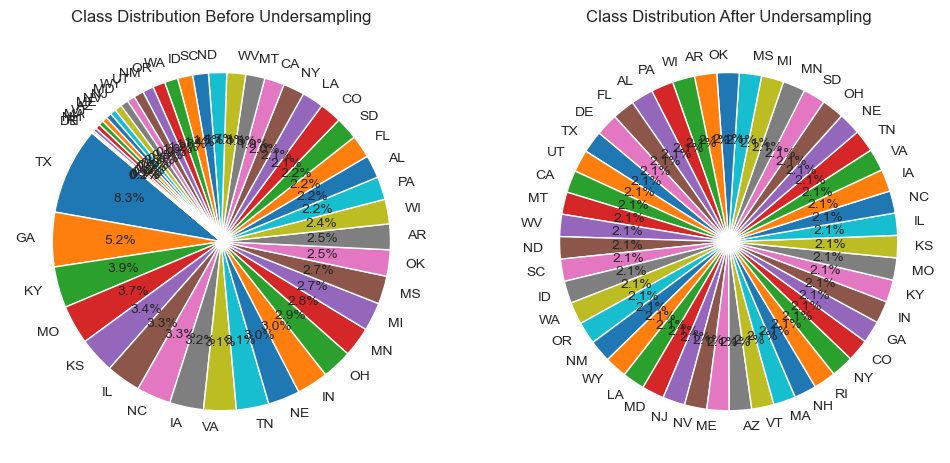

In [26]:
class_counts_before = df['state'].value_counts()

min_class_count = class_counts_before.min()

undersampled_data = []
for class_label, count in class_counts_before.items():
    class_data = df[df['state'] == class_label]
    undersampled_data.append(class_data.sample(min_class_count))

df_undersampled = pd.concat(undersampled_data)

class_counts_after = df_undersampled['state'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('State Distribution Before Undersampling')

axs[1].pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('State Distribution After Undersampling')

plt.show()

In [39]:
encoder = LabelEncoder()
df['isMetro'] = encoder.fit_transform(df['isMetro'])
df['state'] = encoder.fit_transform(df['state'])
df['county'] = encoder.fit_transform(df['county'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,0,1,78,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8,29105,30654,38.0,40.4
1,0,1,78,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
2,0,1,78,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8,29105,30654,38.0,40.4
3,0,1,78,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8,29105,30654,38.0,40.4
4,0,1,78,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8,29105,30654,38.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30555,46,0,1721,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6,3800,3060,43.6,46.0
30556,46,0,1721,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6,3800,3060,43.6,46.0
30557,46,0,1721,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6,3800,3060,43.6,46.0
30558,46,0,1721,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6,3800,3060,43.6,46.0


In [40]:
df['state'] = df['state'].apply(lambda x: bin(x)[2:])
df['county'] = df['county'].apply(lambda x: bin(x)[2:])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,0,1,1001110,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8,29105,30654,38.0,40.4
1,0,1,1001110,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
2,0,1,1001110,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8,29105,30654,38.0,40.4
3,0,1,1001110,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8,29105,30654,38.0,40.4
4,0,1,1001110,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8,29105,30654,38.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30555,101110,0,11010111001,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6,3800,3060,43.6,46.0
30556,101110,0,11010111001,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6,3800,3060,43.6,46.0
30557,101110,0,11010111001,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6,3800,3060,43.6,46.0
30558,101110,0,11010111001,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6,3800,3060,43.6,46.0


In [41]:
df_x = df.drop(columns=['state', 'county'])
df_x

,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,1,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8,29105,30654,38.0,40.4
1,1,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
2,1,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8,29105,30654,38.0,40.4
3,1,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8,29105,30654,38.0,40.4
4,1,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8,29105,30654,38.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30555,0,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6,3800,3060,43.6,46.0
30556,0,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6,3800,3060,43.6,46.0
30557,0,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6,3800,3060,43.6,46.0
30558,0,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6,3800,3060,43.6,46.0


In [42]:
df_y_state = df['state']
df_y_county = df['county']
print(df_y_state, df_y_county)

0             0
1             0
2             0
3             0
4             0
          ...  
30555    101110
30556    101110
30557    101110
30558    101110
30559    101110
Name: state, Length: 30560, dtype: object 0            1001110
1            1001110
2            1001110
3            1001110
4            1001110
            ...     
30555    11010111001
30556    11010111001
30557    11010111001
30558    11010111001
30559    11010111001
Name: county, Length: 30560, dtype: object


In [43]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(df_x, df_y_state, test_size=0.33, random_state=42, stratify=df_y_state)
x_train_s

,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
692,1,15780.00000,7370.59128,13054.72320,12971.55480,8388.37212,18360.94440,11118.24972,87044.4372,77820.062500,1,2,54.2,71451,72609,32.9,32.5
7088,1,10918.23780,10615.71612,15853.72320,17590.21920,7802.60004,19984.93320,9057.16404,91822.5936,67603.148438,2,3,50.9,7091,6732,42.7,44.5
17485,1,8985.07476,5896.52964,11398.64280,6952.76004,5392.19196,0.00000,5097.09372,43722.2928,69691.710938,2,0,54.7,331411,341097,37.9,40.4
29083,1,10812.00000,8218.81644,13787.82600,23290.58160,6895.61496,17102.43360,13372.33560,93479.6076,50345.281250,1,3,55.7,10524,10444,44.5,46.9
13816,0,8208.00000,7173.10908,13222.56840,14752.03440,5573.18220,2788.50456,6250.61724,57968.0160,35686.312500,2,1,65.8,3446,3887,36.6,41.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27241,0,9636.00000,4694.15664,12273.24720,8046.89580,5192.38068,4890.56652,4085.68356,48818.9292,65908.882812,1,1,65,23602,23255,46.5,50.7
10616,0,7956.00000,6533.92164,14007.45360,16190.22960,5250.26988,5750.93112,8264.52324,63953.3316,56810.179688,2,1,57.3,6401,6560,42.6,45.6
17420,1,13782.89760,3631.29384,8418.92868,4672.53996,6309.84816,0.00000,6500.53932,43316.0484,84069.328125,1,0,52.2,252822,261114,36.8,39.2
13770,1,7379.48436,3392.66604,10615.97676,5653.47984,3903.17508,0.00000,5711.98056,36656.7624,59719.175781,1,0,68.2,22575,23519,44.9,47.3


In [44]:
y_train_s

692          10
7088       1011
17485     11100
29083    101101
13816     10101
          ...  
27241    100111
10616      1101
17420     11011
13770     10101
1683         11
Name: state, Length: 20475, dtype: object

In [46]:
x_train_sr = torch.FloatTensor(x_train_s.values)
x_test_sr = torch.FloatTensor(x_test_s)
x_train_sr

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

### 3.2 Model development and training 

In [ ]:
### your code. make as many cells as you need. Retain the outputs of each cell

### 3.3 Model evaluation

In [ ]:
### your code. make as many cells as you need. Retain the outputs of each cell

### 3.4 Analysis 

In [ ]:
### your code. make as many cells as you need. Retain the outputs of each cell